## MSDS 460 Week 2 Discussion Post - Supporting Python Code

Steve Desilets

June 26, 2023

#### Problem

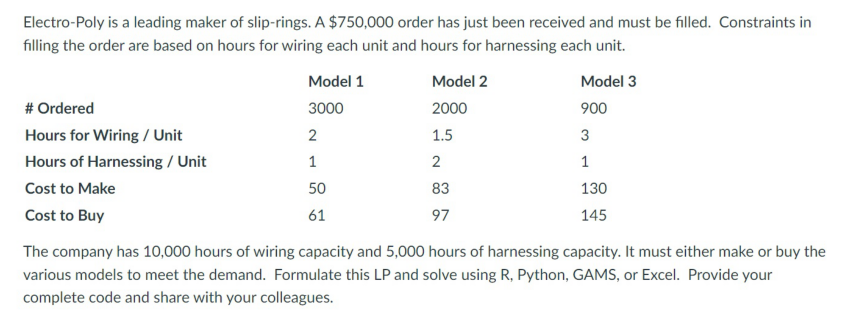

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,15))
question = plt.imread('Discussion_2_Problem.jpg')
plt.imshow(question)
plt.axis("off")
plt.show()

#### Solution

In [7]:
# Let's solve this problem using the simplex method

# Import necessary methods and functions
from pulp import LpVariable, LpProblem, LpMaximize, LpStatus, value, LpMinimize

# Create linear programming variables
Make_One = LpVariable("Make_One", 0, None) # M_One >= 0 & no upper bound; Number of Model 1 Slip Rings Made
Make_Two = LpVariable("Make_Two", 0, None) # M_Two >= 0 & no upper bound; Number of Model 2 Slip Rings Made
Make_Three = LpVariable("Make_Three", 0, None) # M_Three >= 0 & no upper bound ; Number of Model 3 Slip Rings Made
Buy_One = LpVariable("Buy_One", 0, None) # B_One >= 0 & no upper bound; Number of Model One Slip Rings Bought
Buy_Two = LpVariable("Buy_Two", 0, None) # B_Two >= 0 & no upper bound; Number of Model Two Slip Rings Bought
Buy_Three = LpVariable("Buy_Three", 0, None) # B_Three >= 0 & no upper bound; Number of Model Three Slip Rings Bought


# Create the problem variable
prob = LpProblem("problem", LpMinimize)

# Define the constraints - remember that the lower bounds are defined in LpVariable above
prob += Make_One + Buy_One == 3000
prob += Make_Two + Buy_Two == 2000
prob += Make_Three + Buy_Three == 900
prob += (2*Make_One) + (1.5*Make_Two) + (3*Make_Three) <= 10000
prob += Make_One + (2*Make_Two) + Make_Three <= 5000

# Define the objective function to minimize
prob += (50 * Make_One ) + (83 * Make_Two) + (130 * Make_Three) + (61 * Buy_One) + (97 * Buy_Two) + (145 * Buy_Three)

# Solve the problem
status = prob.solve()
LpStatus[status]

# Print the solution
print ("Optimal Solution:")
for variable in prob.variables():
    print(variable.name, " = ", value(variable), " slip rings")

print("Total Cost = $", round(value(prob.objective),2))


Optimal Solution:
Buy_One  =  0.0  slip rings
Buy_Three  =  0.0  slip rings
Buy_Two  =  1450.0  slip rings
Make_One  =  3000.0  slip rings
Make_Three  =  900.0  slip rings
Make_Two  =  550.0  slip rings
Total Cost = $ 453300.0


As displayed in the linear programming problem output above, an optimal solution for this problem would be to buy 0, 1450, and 0  model 1, 2, and 3 slip rings, respectively, and to make 3000, 550, and 900 model 1, 2, and 3 slip rings, respectively. This plan would minimize costs to $453,300.